![](FIAP.png)

<font color='blue'><H3>
Turma: 4IA      
MBA Inteligência Artificial – Machine Learning  
Matéria: Processamento de Linguagem Natural   
Professor: Dheny Fernandes

RM332999 – Alex Inácio

RM332193 – José Rueda

RM332382 – Marcos Cordeiro

RM332686 – Paulo Franco


</H3></font>

### INFORMAÇÕES DO TRABALHO
#### TURMA / DISCIPLINA / PROFESSOR
4IA / PROCESSAMENTO DE LINGUAGEM NATURAL / DHENY FERNANDES
#### TIPO AVALIAÇÃO
Avaliação Total da Disciplina
#### TÍTULO
Trabalho Final
#### DATA LIMITE
09/06/2019
#### DESCRIÇÃO
Utilizando o dataset movies.csv e movie_review1.csv, faça os exercícios solicitados. 
Para a questão 3, use SVM como classificador. 
#### FORMA DO TRABALHO
Quantidade Máxima de 4 Integrantes

<font color='red'><H3>


# Professor escreveu esses valores no quadro, vamos usar como referência e depois excluir essa linha!
dtm
9125 (Linhas no DataFrame) x 8695 (Tamanho Vocabulário)

dtm ajustado
7 (Números de queries) x 8695 (Tamanho Vocabulário)


</H3></font>

# Trabalho Final – NLP
### 1) Implemente o algoritmo Bayesian Sets segundo orientações dada em aula.


### 1.1. Ler o arquivo (conjunto D) usando pandas

In [3]:
#Bibliotecas
import numpy as np
import pandas as pd
from pandas import DataFrame
from unidecode import unidecode
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer


#Spacy
import spacy
#!pip install spacy
!python -m spacy download pt_core_news_sm

#RSLP
nltk.download('rslp')
from nltk.stem.rslp import RSLPStemmer


import random
import string
from sklearn.utils import shuffle #Para não viciar em uma única classe
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm #Classificador
from sklearn import metrics #Para mostrar os valores

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ainacio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ainacio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[+] Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\ainacio\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [2]:
df = pd.read_csv('movies.csv',index_col=0)
df.head()

#Tratativa Professor Dheny
#df = df[['title','genres']]

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
#Tratativa Professor Dheny

# shuffle - embaralha as linhas para evitar problema (aprende apenas amostras de uma categoria e isso pode levar o gradiente a
# ficar preso num mínimo local e só aprender bem sobre)
#df = shuffle(df)
#df = df.reset_index(drop = True)
#df.head()

### 1.2. Fazer o processamento de texto (remoção de stopwords, de acentuação, número, pontuação, stemmização)
#### 1. Entrada: coluna de texto de um df; saída: coluna de texto de um df


In [4]:
#Tratativa Professor Dheny

#def TreatText(data):
    #import pdb; pdb.set_trace()
#    stops = set(stopwords.words("english"))  # melhora a performance convertendo num set
#    data['title'] = [re.sub("[^a-zA-Z]", " ",data['title'][i]) for i in range(len(data))] #mantém apenas letras (há números, links, etc.)     
#    data['title'] = [word_tokenize(data['title'][i].lower()) for i in range(len(data))] # caixa baixa
#    data['title'] = [[w for w in data['title'][i] if w not in stops]for i in range(len(data))]# remove stop words
#    return(data)

#df = TreatText(df)
#df


#labels = np.array(df['genres']) # label para cada uma das frases
#labels

In [5]:
#Tratativa Paulo Franco

#def clear_txt(txt):
#    for a in [d.split(" ") for d in txt]:
#        for x in a:
#            if  not x.isalpha():
#                a.remove(x)
#                return [" ".join(a) for a in [d.split(" ") for d in txt] if a[0].isalpha()]
#print(clear_txt(df.title))

In [4]:
#Tratativa Marcos Cordeiro
#Para validar a função use essa frase -->

text = 'About you. Be and honor the person you are. 10 POINTS to you'

#def lematizacao(text):
#    nlp = spacy.load('pt_core_news_sm')
#    l = []
#    for t in text:
#        l.append(nlp(t))
    
#    return l    

#def stematizacao(text):
#    rslp = RSLPStemmer()
#    s = []
#    for w in text:
#        s.append(rslp.stem(w))
#    return s


#def clean_text(text,lema=True):
def clean_text(text):
    txt_clear = ''.join(i for i in unidecode(text.lower()) if not i.isdigit())
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(txt_clear) 
    ponct = [word for word in word_tokens if word.isalpha()]
    filtered_sentence = [w for w in ponct if not w in stop_words] 
    
#    result = []
#    if(lema==True):
#        result = lematizacao(filtered_sentence)
#    else:
#        result = stematizacao(filtered_sentence)
    return filtered_sentence

In [5]:
print(clean_text(text))

['honor', 'person', 'points']


In [8]:
#print(clean_text(df.title))

In [9]:
#Tratativa Marcos Cordeiro
def clear_df(db):
    df = pd.read_csv(db)
    movies_clear = []
    for m in df.title:
        movies_clear.append(clean_text(m,False))

    titles_again = []
    for t in movies_clear:
        titles_again.append(TreebankWordDetokenizer().detokenize(t))

    df = pd.DataFrame(titles_again, columns = ['title']) 
    return df.dropna()

In [10]:
df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [11]:
def texto_tokenize(txt):
    return [word_tokenize(t) for t in txt]
wt = texto_tokenize(df.title)
wt

[['Toy', 'Story', '(', '1995', ')'],
 ['Jumanji', '(', '1995', ')'],
 ['Grumpier', 'Old', 'Men', '(', '1995', ')'],
 ['Waiting', 'to', 'Exhale', '(', '1995', ')'],
 ['Father', 'of', 'the', 'Bride', 'Part', 'II', '(', '1995', ')'],
 ['Heat', '(', '1995', ')'],
 ['Sabrina', '(', '1995', ')'],
 ['Tom', 'and', 'Huck', '(', '1995', ')'],
 ['Sudden', 'Death', '(', '1995', ')'],
 ['GoldenEye', '(', '1995', ')'],
 ['American', 'President', ',', 'The', '(', '1995', ')'],
 ['Dracula', ':', 'Dead', 'and', 'Loving', 'It', '(', '1995', ')'],
 ['Balto', '(', '1995', ')'],
 ['Nixon', '(', '1995', ')'],
 ['Cutthroat', 'Island', '(', '1995', ')'],
 ['Casino', '(', '1995', ')'],
 ['Sense', 'and', 'Sensibility', '(', '1995', ')'],
 ['Four', 'Rooms', '(', '1995', ')'],
 ['Ace', 'Ventura', ':', 'When', 'Nature', 'Calls', '(', '1995', ')'],
 ['Money', 'Train', '(', '1995', ')'],
 ['Get', 'Shorty', '(', '1995', ')'],
 ['Copycat', '(', '1995', ')'],
 ['Assassins', '(', '1995', ')'],
 ['Powder', '(', '1995', '

### 1.4. Atribuir as queries a uma lista, formando uma lista de strings. Depois, aplicar o mesmo processamento de texto aplicado em D (passo 1)

In [12]:
y = [x for x in[a for a in wt]]
y

[['Toy', 'Story', '(', '1995', ')'],
 ['Jumanji', '(', '1995', ')'],
 ['Grumpier', 'Old', 'Men', '(', '1995', ')'],
 ['Waiting', 'to', 'Exhale', '(', '1995', ')'],
 ['Father', 'of', 'the', 'Bride', 'Part', 'II', '(', '1995', ')'],
 ['Heat', '(', '1995', ')'],
 ['Sabrina', '(', '1995', ')'],
 ['Tom', 'and', 'Huck', '(', '1995', ')'],
 ['Sudden', 'Death', '(', '1995', ')'],
 ['GoldenEye', '(', '1995', ')'],
 ['American', 'President', ',', 'The', '(', '1995', ')'],
 ['Dracula', ':', 'Dead', 'and', 'Loving', 'It', '(', '1995', ')'],
 ['Balto', '(', '1995', ')'],
 ['Nixon', '(', '1995', ')'],
 ['Cutthroat', 'Island', '(', '1995', ')'],
 ['Casino', '(', '1995', ')'],
 ['Sense', 'and', 'Sensibility', '(', '1995', ')'],
 ['Four', 'Rooms', '(', '1995', ')'],
 ['Ace', 'Ventura', ':', 'When', 'Nature', 'Calls', '(', '1995', ')'],
 ['Money', 'Train', '(', '1995', ')'],
 ['Get', 'Shorty', '(', '1995', ')'],
 ['Copycat', '(', '1995', ')'],
 ['Assassins', '(', '1995', ')'],
 ['Powder', '(', '1995', '

In [13]:
query = ['toy story', 'the lion king','alladin','beauty and the best','cinderella','little mermaid','hercules']
query

['toy story',
 'the lion king',
 'alladin',
 'beauty and the best',
 'cinderella',
 'little mermaid',
 'hercules']

### 1.5. Criar uma nova função que vai construir um DTM de queries ajustado ao DTM de D. Passar para essa função (df[textos], queries) ambos com o processamento da etapa 2 realizado.
#### – Dentro da função, criar um DTM de D (df[textos]). Aplicar um transform do resultado do DTM acima em queries

In [14]:
vect = CountVectorizer(ngram_range=(1,1))
D = vect.fit_transform(df.title)
D

<27278x21960 sparse matrix of type '<class 'numpy.int64'>'
	with 118926 stored elements in Compressed Sparse Row format>

In [15]:
Dc = vect.transform(query)
Dc

<7x21960 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

### 1.6. Usando esses dois DTMs, calcular todos os parâmetros apresentados no slide 33. 

![](score.jpg)

In [16]:
x = D.A
m = x.mean(axis=0)
c = 2
B = c*(1-m)
a = c*m

In [17]:
x
m
c
B
a

array([1.31974485e-03, 7.33191583e-05, 7.33191583e-05, ...,
       7.33191583e-05, 7.33191583e-05, 7.33191583e-05])

In [18]:
a_til = a + x.sum()
a_til

array([122241.00131974, 122241.00007332, 122241.00007332, ...,
       122241.00007332, 122241.00007332, 122241.00007332])

In [19]:
N = len(Dc.sum(axis=1))
N

7

In [20]:
B_til = B + N - x.sum()
B_til

array([-122232.00131974, -122232.00007332, -122232.00007332, ...,
       -122232.00007332, -122232.00007332, -122232.00007332])

In [21]:
#nc = 

### 2) Utilizando o algoritmo implementado e o dataset movies.csv como base de pesquisa, use as seguintes frases (queries) para obter exemplos semelhantes no dataset.

### 2a. Remova o ano do título do filme antes

### 2b. Queries: ['toy story', 'the lion king','alladin','beauty and the best','cinderella',' little mermaid','hercules']

### 2c. Resultado esperado (aproximado):

![](resultado_esperado.jpg)

### 3) Utilizando o dataset movie_review1, visto na aula de Naive Bayes, crie um classificador de sentimentos utilizando word2vec.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('movie_review1.csv',index_col=0)
data.head()

,text,tag
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1


In [3]:
vec = CountVectorizer()
#vectfidf = TfidfVectorizer()
vector = vec.fit_transform(data['text'])
#print(vec.get_feature_names())
#print(vector.toarray()) #apenas para CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(vector, data['tag'], test_size=0.3, random_state=69)

In [4]:
model = MultinomialNB().fit(X_train, y_train)
#Fit calcula as probabilidades apriori
predicted = model.predict(X_test)

In [5]:
print(classification_report(y_test, predicted)) #support = The number of occurrences of each label in y_true
#y_test possui as resostas corretas

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      9561
           1       0.72      0.70      0.71      9855

   micro avg       0.71      0.71      0.71     19416
   macro avg       0.71      0.71      0.71     19416
weighted avg       0.71      0.71      0.71     19416



#### Acurácia = (TP + TN)/ Test data size

#### Precisão = TP / (TP+FP) - % de itens selecionados que são corretos

#### Recall = TP / (TP+FN) -  % de itens corretos que são selecionados

#### F1 SCORE = 2X ((Precision x Recall) / (Precision + Recall))

In [6]:
print(np.mean(predicted == y_test)) #acc

0.7079213020189534


In [7]:
#word2vec
import pickle
import tensorflow as tf
import gensim
from gensim.models import Word2Vec
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random
import string
from sklearn.utils import shuffle #Para não viciar em uma única classe
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm #Classificador
from sklearn import metrics #Para mostrar os valores

C:\ProgramData\Anaconda3\envs\py3.6\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
# parâmetros do word2vec
dim_vec = 300
min_count = 10
window = 4
num_workers = multiprocessing.cpu_count()
seed = tf.set_random_seed(42)

### 3a) Utilize F1-score como métrica

### 3b) Compare CBOW com Skip-gram. Qual obteve o melhor resultado?

### 4) Execute o algoritmo LDA no mesmo dataset (movie_review1) usando apenas 2 tópicos. Descreva os resultados indicando se ele conseguiu separar bem reviews positivos de reviews negativos

In [1]:
#Bibliotecas
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ainacio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\ProgramData\Anaconda3\envs\py3.6\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Stop-words: para o conjunto a ser analisado, precisamos adicionar mais algumas stop-words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [6]:
#Vamos utilizar o movie_review1 dataset para esse exercício.

df = pd.read_csv('movie_review1.csv',index_col=0)
print(df.text.unique())
df.head()

["films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before ."
 "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen ."
 'to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .'
 ...
 'after watching one of the " roxbury " skits on snl , this is what you come away with from the characters : they bob their heads to " what is love ? " ,'
 "bump unsuspecting women , and . . . that's all ."
 "after watching _a_night_at_the_roxbury_ , you'll be left with exactly the same ."]


,text,tag
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1


In [9]:
#Vamos tratar isso usando regex

# Converte para lista
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove caracter de nova linha
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove aspas simples
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['films adapted from comic books have had plenty of success , whether theyre '
 'about superheroes ( batman , superman , spawn ) , or geared toward kids ( '
 'casper ) or the arthouse crowd ( ghost world ) , but theres never really '
 'been a comic book like from hell before .']


In [10]:
#O texto ainda está bagunçado e, portanto, não pronto para executar LDA.
#Precisamos tokenizar e deixá-lo mais limpo. Para isso, vamos usar gensim simple_preprocess.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remove pontuação

data_words = list(sent_to_words(data))

print(data_words[:1])

[['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', 'whether', 'theyre', 'about', 'superheroes', 'batman', 'superman', 'spawn', 'or', 'geared', 'toward', 'kids', 'casper', 'or', 'the', 'arthouse', 'crowd', 'ghost', 'world', 'but', 'theres', 'never', 'really', 'been', 'comic', 'book', 'like', 'from', 'hell', 'before']]


In [11]:
#Agora, podemos criar bigramas (duas palavras que frequentemente ocorrem no documento) 
#e trigramas (3 palavras que ocorrem frequentemente)

# cria modelos bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # quanto maior o threshold menos frases
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma sentença como um trigrama / bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# exemplo trigrama
print(trigram_mod[bigram_mod[data_words[0]]])

C:\ProgramData\Anaconda3\envs\py3.6\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['films', 'adapted', 'from', 'comic_books', 'have', 'had', 'plenty', 'of', 'success', 'whether', 'theyre', 'about', 'superheroes', 'batman', 'superman', 'spawn', 'or', 'geared', 'toward', 'kids', 'casper', 'or', 'the', 'arthouse', 'crowd', 'ghost', 'world', 'but', 'theres', 'never', 'really', 'been', 'comic_book', 'like', 'from', 'hell', 'before']


In [12]:
#Agora precisamos remover stop-words, criar bigramas sobre o texto e lematizar
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
#python -m spacy download en

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# cria Bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# inicia o spacy, mantenddo apenas o tagger (eficiência)
nlp = spacy.load('en', disable=['parser', 'ner'])

# faz lemmatização mantendo apenas substantivo, adjetivo, verbo, advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['film', 'adapt', 'comic_book', 'plenty', 'success', 'be', 'superhero', 'batman', 'superman', 'spawn', 'gear', 'kid', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'there', 's', 'never', 'really', 'comic_book', 'hell']]


In [14]:
#Agora precisamos criar o dicionário e o corpus para executar o LDA

# cria o dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Cria o corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]


In [16]:
#Gensim cria um id exclusivo para cada palavra no documento. O corpus produzido mostrado acima é um mapeamento de
#(word_id, word_frequency).
#Por exemplo, (0, 1) acima implica que a palavra cujo id é 0 ocorre uma vez no primeiro documento. Da mesma forma,
#a palavra id 1 ocorre duas vezes e assim por diante.

#Isso é usado como entrada pelo modelo LDA.

#Se você quiser ver a palavra que um determinado id corresponde, passe o id como uma chave para o dicionário.
#id2word[0]
id2word[1]

'arthouse'

In [17]:
#Temos tudo o que é necessário para treinar o modelo LDA. Além do corpus e do dicionário,
#você também precisa fornecer o número de tópicos.
#Além disso, alfa e eta são hiperparâmetros que afetam a dispersão dos tópicos.
#De acordo com os documentos do Gensim, o padrão é 1.0 / num_topics anterior.
#chunksize é o número de documentos a serem usados em cada bloco de treinamento.
#update_every determina com que frequência os parâmetros do modelo devem ser atualizados e passes
#é o número total de passes de treinamento.

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
#O modelo de LDA acima é construído com 20 tópicos diferentes, em que cada tópico é uma combinação de palavras-chave
#e cada palavra-chave contribui com um certo peso para o tópico.
#Você pode ver as palavras-chave de cada tópico e a ponderação (importância) de
#cada palavra-chave usando lda_model.print_topics () como mostrado a seguir
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.170*"not" + 0.090*"do" + 0.045*"say" + 0.035*"want" + 0.033*"think" + '
  '0.017*"reason" + 0.017*"interesting" + 0.016*"club" + 0.016*"need" + '
  '0.015*"comic"'),
 (1,
  '0.129*"make" + 0.037*"new" + 0.034*"star" + 0.022*"line" + 0.018*"hard" + '
  '0.017*"series" + 0.017*"instead" + 0.015*"create" + 0.014*"bring" + '
  '0.014*"sequence"'),
 (2,
  '0.064*"play" + 0.059*"give" + 0.055*"try" + 0.022*"least" + 0.016*"always" '
  '+ 0.015*"project" + 0.013*"mostly" + 0.010*"grow" + 0.010*"son" + '
  '0.010*"plan"'),
 (3,
  '0.039*"director" + 0.033*"set" + 0.032*"nothing" + 0.027*"long" + '
  '0.027*"sure" + 0.023*"almost" + 0.023*"anything" + 0.018*"include" + '
  '0.018*"girl" + 0.016*"direct"'),
 (4,
  '0.055*"watch" + 0.050*"well" + 0.043*"funny" + 0.036*"something" + '
  '0.033*"performance" + 0.030*"last" + 0.029*"laugh" + 0.027*"minute" + '
  '0.025*"cast" + 0.017*"everyone"'),
 (5,
  '0.211*"film" + 0.073*"good" + 0.045*"look" + 0.036*"could" + 0.032*"big" + '
  '0.029

In [19]:
#Perplexidade de modelo e coerência de tópico fornecem uma medida conveniente para
#julgar quão bom é um determinado modelo de tópico.
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # uma medida de quão bom o modelo é. quanto maiss baaixa, melhor

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.072751962630294

Coherence Score:  0.26813398272589695


In [20]:
#Agora que o modelo de LDA foi criado, a próxima etapa é examinar os tópicos produzidos e as palavras-chave associadas. Não há ferramenta melhor do que o gráfico interativo do pacote pyLDAvis e foi projetado
#para funcionar bem com os Jupyter notebooks.

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\envs\py3.6\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.071222 -0.136265       1        1  7.815598
5     -0.178430 -0.349728       2        1  7.318368
15    -0.359641  0.223337       3        1  6.787886
0     -0.060802  0.030417       4        1  5.828362
1      0.033234  0.003706       5        1  5.040674
8      0.028647  0.010417       6        1  4.992870
19     0.033498  0.019324       7        1  4.910476
16     0.036189  0.012802       8        1  4.826092
7      0.036464  0.023562       9        1  4.796582
3      0.041575  0.020063      10        1  4.770416
12     0.035929  0.005801      11        1  4.764055
18     0.036022  0.005251      12        1  4.757766
2      0.039787  0.014680      13        1  4.744751
9      0.045287  0.012532      14        1  4.494891
4      0.049037  0.014999      15        1  4.167651
17     0.047173  0.018143      16        1  4.151879
13     0.051879  0.017673      17        1  4.029019
11     0.049733  0.014158      18        1  4.004545
10     0.050375  0.017660      19        1  3.952691
14     0.055266  0.021469      20        1  3.845416, topic_info=     Category          Freq       Term         Total  loglift  logprob
7     Default  10218.000000       film  10218.000000  30.0000  30.0000
308   Default   8017.000000      movie   8017.000000  29.0000  29.0000
62    Default   6540.000000        not   6540.000000  28.0000  28.0000
205   Default   4301.000000       make   4301.000000  27.0000  27.0000
70    Default   3841.000000        get   3841.000000  26.0000  26.0000
15    Default   3764.000000          s   3764.000000  25.0000  25.0000
452   Default   3907.000000  character   3907.000000  24.0000  24.0000
61    Default   3483.000000         do   3483.000000  23.0000  23.0000
3     Default   3238.000000         be   3238.000000  22.0000  22.0000
49    Default   3128.000000      would   3128.000000  21.0000  21.0000
85    Default   3514.000000       good   3514.000000  20.0000  20.0000
143   Default   2901.000000       even   2901.000000  19.0000  19.0000
225   Default   2851.000000       time   2851.000000  18.0000  18.0000
212   Default   2673.000000        see   2673.000000  17.0000  17.0000
158   Default   2990.000000         go   2990.000000  16.0000  16.0000
289   Default   2413.000000        bad   2413.000000  15.0000  15.0000
250   Default   2609.000000      scene   2609.000000  14.0000  14.0000
303   Default   1992.000000       come   1992.000000  13.0000  13.0000
469   Default   2009.000000      story   2009.000000  12.0000  12.0000
325   Default   1937.000000       plot   1937.000000  11.0000  11.0000
387   Default   2001.000000       play   2001.000000  10.0000  10.0000
482   Default   1968.000000       take   1968.000000   9.0000   9.0000
220   Default   1906.000000       much   1906.000000   8.0000   8.0000
41    Default   2178.000000       look   2178.000000   7.0000   7.0000
772   Default   1862.000000       give   1862.000000   6.0000   6.0000
487   Default   1824.000000       work   1824.000000   5.0000   5.0000
122   Default   1637.000000      first   1637.000000   4.0000   4.0000
137   Default   1713.000000        try   1713.000000   3.0000   3.0000
99    Default   1571.000000        end   1571.000000   2.0000   2.0000
45    Default   1740.000000        say   1740.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
130   Topic20   1109.792603       turn   1110.724854   3.2574  -3.1327
142   Topic20    874.993103        can    875.925415   3.2572  -3.3704
150   Topic20    809.633362       name    810.565674   3.2571  -3.4480
707   Topic20    754.216431        old    755.148743   3.2571  -3.5189
692   Topic20    719.810913      young    720.743225   3.2570  -3.5656
2082  Topic20    427.764069      house    428.696381   3.2561  -4.0860
701   Topic20    404.525299       stop    405.457611   3.2560  -4.1419
1869  Topic20    398.0

In [21]:
#O compute_coherence_values () treina vários modelos de LDA e fornece os modelos
#e suas pontuações de coerência correspondentes.

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=6)

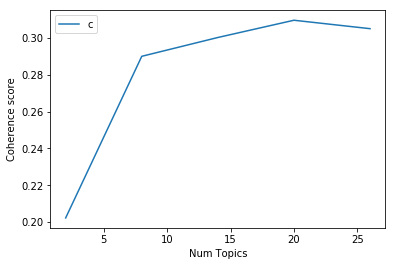

In [23]:
# Visualizando os resultados
limit=30; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2023
Num Topics = 8  has Coherence Value of 0.2901
Num Topics = 14  has Coherence Value of 0.3003
Num Topics = 20  has Coherence Value of 0.3097
Num Topics = 26  has Coherence Value of 0.3051


In [25]:
lda_model[corpus[0]]

([(0, 0.05060606),
  (1, 0.043819167),
  (2, 0.04101789),
  (3, 0.047673076),
  (4, 0.03626506),
  (5, 0.06984777),
  (6, 0.06737254),
  (7, 0.0669769),
  (8, 0.04350799),
  (9, 0.038990073),
  (10, 0.04074546),
  (11, 0.034792937),
  (12, 0.06638323),
  (13, 0.034955002),
  (14, 0.033395283),
  (15, 0.05905),
  (16, 0.041851453),
  (17, 0.0423336),
  (18, 0.047501665),
  (19, 0.092914805)],
 [(0, [19]),
  (1, [7, 5, 1, 6, 19, 14, 8, 12, 11, 3, 17, 4, 10, 9, 16, 15, 13, 18, 0, 2]),
  (2, [19]),
  (3, [18]),
  (4, [19, 12, 7, 10, 2, 5, 15, 6, 8, 3, 17, 11, 18, 1, 14, 4, 9, 13, 0, 16]),
  (5, [19]),
  (6, [19]),
  (7, [5]),
  (8, [19]),
  (9, [19]),
  (10, [7]),
  (11, [12]),
  (12, [17]),
  (13, [19]),
  (14, [10]),
  (15, [7]),
  (16, [12]),
  (17, [7]),
  (18, [12]),
  (19, [3]),
  (20, [7]),
  (21, [12])],
 [(0, [(19, 1.0)]),
  (1,
   [(0, 0.028075468),
    (1, 0.07132684),
    (2, 0.026845152),
    (3, 0.04856965),
    (4, 0.04589796),
    (5, 0.07368262),
    (6, 0.06418461),
    (